In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
import dmStyle
dmStyle.customize_mpl()


Setting custom matplotlib visual style


In [3]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

###Neural Network
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{1, 2, 3,\dots, k\})$.

Your goal in this assignment is to implement multi-class Neural NeTwork classifier. Specifically, we will be implementing a three-layer neural network. We will be using $1-in-k$ class representation and will be using $k$ output neurons for $k$ different classes. During training we will be representing each example's class label with a binary vector of $k$ dimensions with $j_th$ dimension to which example example will be set to 1. For instance, if an example has a label$=4$ and total number of classes are 6 then it's label during training will be represented by the vector =$[0,0,0,1,0,0]$

We will be using following cost function to measure the effectiveness of our learned system.  In other words, in Neural Network we try to optimize (minimize) following cost function (without regularization) to find the optimal decision boundary :


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} \lbrack -y_j^{(i)} \log(a^{(3)}_k(x^{(i)})) - (1-y_j^{(i)}) \log(1-a^{(3)}_k(x^{(i)})) \rbrack$$

Here $a^{(3)}_k$ is the $k_{th}$ neuron of 3rd layer of neural network. Recall that this cost function is identical to the cost function we have seen in the multi-class logistic regression, except here the cost function uses the output layer neurons instead of the usual single sigmoid function.

This also implies that we will be using the last layer neurons output as our hypotheses, and during testing the label of the hypothesis that gives highest score to a test example will be used as label of the test example.

To find the best set of parameters we will be using a gradient descent or stochastic gradient descent. For that to work, we will need to compute the derivatives of our cost function w.r.t to our parameter $\theta$'s$.

Now recall from your class that, derivatives for a single example will be:

$$
\begin{align}
\frac{\partial}{\partial \theta_{11}^{(2)}} J(W,b) &=\underbrace{\frac{1}{m}\left([ a^3_1(1-a^3_1)]\frac{(a^3_1-y_1)}{a^3(1-a^3_1)}\right)}_{\delta^{3}_1} a^{(2)}_1
 = \delta^{3}_1 a^{(2)}_1
\end{align}
$$
Similary

$$
\begin{align}
\frac{\partial}{\partial \theta_{12}^{(2)}} J(W,b) = \delta^{3}_1 a^{(2)}_2
\end{align}
$$

Thus the partial derivatives of the output layer can be written in a matrix-vector prodcut, i.e.
$$\begin{align}
\frac{\partial}{\partial \theta^{(2)}} J(W,b) = \delta^{3} * a^{(2)T}
\end{align}$$

Where $ \delta^{3}=\frac{1}{m} (a^3-y)$

Recall that we can similarly write the partial derivatives of first layer, i.e.
$$\begin{align}
\frac{\partial}{\partial \theta^{(1)}} J(W,b) = \delta^{2} * X^{T} \mbox{ ; You can substitue X with $a^1$ as well.}
\end{align}$$

Where $ \delta^{2}=\theta^{(2)T}*\delta^3 .* (a^2*(1-a^2))$. Here '$.*$' means element-wise multiplication and '$*$' means matrix-vector prodcut.

##Summary of Algorithm:

 - *Forward Pass:* In the forward pass you will compute the $a$'s, using following expressions:
     $a^2=\theta^1 * X$ and $a^3=\theta^2 * a^2$
 - *BackWard Pass:* In the backward pass you will compute the deltas and using those deltas you will find the derivatives of the cost function.
 
![Derivation of the gradients](Hand-Written-nn.jpg "Summary of the derivation")

*Remember to exclude the bias-term during the calculations of derivatives of $\theta^1$

In [4]:
import time 
def GradientDescent(X,Y,cost_function,derivative_cost_function,nparams,maxiter=20000, alpha=0.01, plotcf=True):

    eps=0.00001
    thetas=rand(nparams,1)
    # lets map the thetas to the range [-1,1]
    stime=time.time() # Get the Starting time...
    
    thetas= thetas*2-1  # output = input * range_output  + min_output

    theta_old=thetas
    theta_new=thetas+1

#     pai=int(maxniter / 200) # plot in total 200 number of points
    #print cf
    numiter=0
    costValue=[]
    numit=[]
    df=ones(thetas.shape)
    converged=False
    printIter=0
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad =derivative_cost_function(X,Y,theta_old)
        #theta_new=theta_old - (alpha*grad)
        for k in range(len(thetas)):
            theta_new[k]=theta_old[k] - alpha * grad[k]
        # Cost function with new thetas
        if printIter==numiter:
            printIter+=500
            
            e =cost_function(X,Y,theta_new)
            numit.append(numiter)
            costValue.append(e)
            print 'Value of Cost Function (obtained in {} iterations) is {}'.format(numiter,e)
        if np.linalg.norm(grad)<=eps:
            converged=True
     
        theta_old=theta_new
        numiter += 1  # update iter

        if numiter == maxiter:
            print 'Max interactions exceeded!'
            converged = True
    plt.plot(numit,costValue)    
    print 'Value of Cost Function at Minimum Points {}, is {}'.format(theta_new,e)
    print 'Total time taken ={:.4} seconds '.format(time.time()-stime) # difference between current and stored time
    return theta_new


In [5]:
import pdb
def one_of_k(ilabels):

    classes=np.unique(ilabels)
    
    nclasses=len(classes)
    
    olabels=np.zeros((ilabels.shape[0],nclasses))
    
    for i, l in enumerate(ilabels):        
        olabels[i,classes==l]=1
        
    return olabels

**Warning: In this assignment we will be assuming our data-matrix X to be $d \times m$ instead of $m\times d$, similary our Y will be $k\times m$ instead of $m \times k$, since that's how we derived our derivatives in the class.**

In [18]:
class NeuralNetwork:

    def __init__(self,ifeatdim,nnhlayer,classes,alpha,lambd,maxniter,scalefeatures):        
        self.thetas=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        self.classes=np.unique(classes)

        self.nclasses=len(self.classes) # dimensions of output
        self.ifeatdim=ifeatdim # dimension of input features,
        self.nnhlayer=nnhlayer # number of neurons in hidden layer
        
        self.maxniter=maxniter
        self.alpha=alpha
        self.lembda= lambd 
        self.sl1theta= (nnhlayer, ifeatdim) # l1theta's shape, remember 1 is already added for bias terms
        self.sl2theta= (self.nclasses, nnhlayer+1) # l2thetas's shape, +1 for bias terms

        # thetas's for neurons + bias terms..
        
        self.nthetas= (self.nclasses * nnhlayer+ nnhlayer* self.ifeatdim) + (self.nclasses)
        
        assert(self.nthetas == np.product(self.sl1theta[:])+np.product(self.sl2theta[:])) # for debugging 

        pass
    
    def getnparam(self):

        return self.nthetas
    def unroll_thetas(self,thetas):


        l1theta= thetas[:np.product(self.sl1theta)].reshape(self.sl1theta)

        l2theta= thetas[np.product(self.sl1theta):].reshape(self.sl2theta)

        return l1theta, l2theta

    def roll_thetas(self,l1theta,l2theta):

        return np.concatenate( ( l1theta.ravel(),l2theta.ravel() )  )

    def forward_pass(self, X, thetas):

        l1theta,l2theta=self.unroll_thetas(thetas) # unroll the thetas...
        # layer 1 computations...
        a2=l1theta.dot(X)
       
        # append 1's for the bias terms...
        a2=np.vstack((a2,np.ones((1,a2.shape[1]))))
        a2=self.sigmoid(a2)
        #layer 2 computations...
        a3= l2theta.dot(a2)
        a3=self.sigmoid(a3)
        return a2,a3
    def sigmoid(self,z):

        z = maximum(minimum(16,z),-16) 
        return 1/(1+np.exp(-z))        
    
    
    def hypothesis(self, X,thetas):

    
        return (self.forward_pass(X,thetas))[1]
    
    def cost_function(self, X,Y, theta):

        m=X.shape[1]
        cost = (1.0/m) * np.sum((-Y * (np.log10(self.hypothesis(X,theta))) - (1-Y)*(np.log10(1-self.hypothesis(X,theta)))))
        cost+=(self.lembda*np.sum(theta.ravel()**2))/2.0
        return cost
    def derivative_cost_function(self,X,Y,thetas):

#         pdb.set_trace()
        #forward pass
        a2, a3=self.forward_pass(X,thetas)
        
        #now back-propogate 

        # unroll thetas
        l1theta,l2theta=self.unroll_thetas(thetas)
        nexamples=float(X.shape[1])
        
        # compute delta3, l2theta
        delta3= (a3-Y)/float(X.shape[1])
        L2theta = delta3.dot(a2.T)
        # compute delta2, l1theta
        delta2 = ((l2theta.T).dot(delta3)*a2*(1-a2))[:-1]
        L1theta =delta2.dot(X.T)
        
        #remember to exclude last element of delta2, representing the deltas of bias terms...
        # i.e. delta2=delta2[:-1]

        # roll thetas into a big vector
        regularizedTheta=thetas
        thetas=(self.roll_thetas(L1theta,L2theta)) # return the same shape as you received
        thetas+=(self.lembda*regularizedTheta.ravel())
        return thetas

    def train(self, X, Y):

        
        nfeatures,nexamples=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        nY=one_of_k(Y.T) # get a n x k
        nparams=self.getnparam()
        print 'Calling Gradient Descent with following number of parameter={}'.format(nparams)
        self.thetas=GradientDescent(X,nY.T,self.cost_function,self.derivative_cost_function,self.getnparam(), self.maxniter,self.alpha)

    def predict(self, X):
        

        num_test = X.shape[1]
        
        if self.sl1theta[1]-X.shape[0] ==1:
            # append 1 at the end of each example for the bias term
            X=np.vstack((X,np.ones((1,X.shape[1]))))
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
        
        pred=self.hypothesis(X,self.thetas)
        
        '''maxrange=X.shape[1]
        Ypred=[]
        for l in range(0,maxrange):
            labelPred=np.argmax(pred[:,l])
            Ypred.append(self.classes[labelPred])'''

        return pred
        
        #return np.array(Ypred).reshape((num_test,1))
    
    
    def scale_features(self,X):

        self.xmin= np.min(X,axis=1)
        self.xmax= np.max(X,axis=1)

        return (X-self.xmin)/(self.xmax-self.xmin)

In [9]:
#convert predicted classes to a matrix...
def class_2_matrix(Y, nclasses):
    ntest=len(Y)
    pclassm=np.zeros((ntest,nclasses))

    for i in range(len(Y)):
        j=int(Y[i].split('_')[1])-1
        pclassm[i,j]=1
    
    return pclassm

In [10]:
def write_in_kaggle_format(filename,ids,pclasses,nclasses=9):
    #write the result in the kaggle's required format
    
    #pclasses=class_2_matrix(pclasses,nclasses)
    
    dic=defaultdict(list) #build dictionary...
    dic['id']=ids
    for i in range(pclasses.shape[1]):
        dic['Class_'+str(i+1)]=pclasses[:,i]

    output = pd.DataFrame(dic,columns=['id','Class_1','Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'])

    # Use pandas to write the comma-separated output file
    output.to_csv( filename, index=False, quoting=3 )

## Otto Group Product Classification Challenge

In [11]:
data=pd.read_csv('./kaggle 2/train.csv')
datatest=pd.read_csv('./kaggle 2/test.csv')
print data.describe()
print data.columns

                 id       feat_1        feat_2        feat_3        feat_4  \
count  61878.000000  61878.00000  61878.000000  61878.000000  61878.000000   
mean   30939.500000      0.38668      0.263066      0.901467      0.779081   
std    17862.784315      1.52533      1.252073      2.934818      2.788005   
min        1.000000      0.00000      0.000000      0.000000      0.000000   
25%    15470.250000      0.00000      0.000000      0.000000      0.000000   
50%    30939.500000      0.00000      0.000000      0.000000      0.000000   
75%    46408.750000      0.00000      0.000000      0.000000      0.000000   
max    61878.000000     61.00000     51.000000     64.000000     70.000000   

             feat_5        feat_6        feat_7        feat_8        feat_9  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.071043      0.025696      0.193704      0.662433      1.011296   
std        0.438902      0.215333      1.030102      2.25577

In [12]:
Y=data['target']

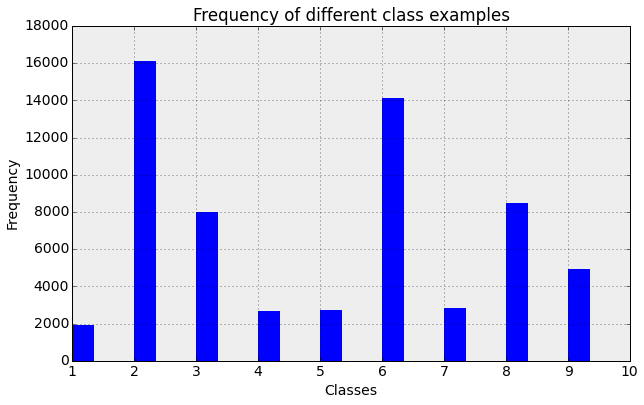

In [13]:
#Seeing is beleaving, so lets start...
#Lets first plot the frequency of each class...
freq=scipy.stats.itemfreq(Y)# Get frequency of each class....
plt.bar(np.arange(1,len(freq[:,1])+1),freq[:,1],width=0.35)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of different class examples')

In [14]:
# Get your data in matrix
X=np.asarray(data.ix[:,1:-1].dropna(),dtype=np.float32)
ids=np.array(datatest['id'])
XtestK=np.array(datatest.ix[:,1:].values,dtype=np.float32)
print X.shape
Y=np.asarray(data.ix[:,-1])
print Y, Y.shape, len(np.unique(Y)) # so we have 9 classes...
unique=np.unique(Y)
nclasses=len(np.unique(Y))

(61878L, 93L)
['Class_1' 'Class_1' 'Class_1' ..., 'Class_9' 'Class_9' 'Class_9'] (61878L,) 9


In [15]:
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape

 Training Data Set Dimensions= (43315L, 93L) Training True Class labels dimensions (43315L,)
 Test Data Set Dimensions= (18563L, 93L) Test True Class labels dimensions (18563L,)


In [16]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))
Y=Y.reshape((len(Y),1))

In [ ]:
learning_rate = 10 ** np.random.uniform(-4, 1,10)
lambdas = 10 ** np.random.uniform(-6, 1,10)
acc=np.zeros((len(learning_rate),len(lambdas)))
for i,alp in enumerate(learning_rate):
    for j,lam in enumerate(lambdas):
        print "for alpha {} and lambda {}".format(alp,lam)
        nnclass=NeuralNetwork(Xtrain.shape[1],100,np.unique(Y),alp,lam,5000,False)#,withsgd=True,minibatch=80,epochs=2)
        nnclass.train(Xtrain.T,Ytrain.T)
        Z= nnclass.predict(Xtest.T);
        acc[i,j]=np.sum(Z.ravel()==Ytest.ravel())/float(len(Ytest)) # use logloss if you are evaluating via logloss
        np.save('rs-results-spiral-60-trails',acc);

for alpha 0.0238675577941 and lambda 9.40796517603
Calling Gradient Descent with following number of parameter=10209
Value of Cost Function (obtained in 0 iterations) is 9599.38575861
Value of Cost Function at Minimum Points [[ 0.0002779 ]
 [ 0.00018838]
 [ 0.00067947]
 ..., 
 [-0.01356497]
 [-0.01356497]
 [-0.01943066]], is 9599.38575861
Total time taken =42.99 seconds 
for alpha 0.0238675577941 and lambda 0.0134228267365
Calling Gradient Descent with following number of parameter=10209
Value of Cost Function (obtained in 0 iterations) is 36.6210385322

In [ ]:
ridx,cidx= np.unravel_index(np.argmax(acc), acc.shape)
print ridx,cidx
# simple step-wise code
print ridx, cidx,'Best Alpha=', learning_rate[ridx],'Best Lambda=',lambdas[cidx]

Calling Gradient Descent with following number of parameter=12369
Value of Cost Function (obtained in 0 iterations) is 6.04625493688
Value of Cost Function (obtained in 500 iterations) is 0.711941986554
Value of Cost Function (obtained in 1000 iterations) is 0.626707377208
Value of Cost Function (obtained in 1500 iterations) is 0.589647779191
Value of Cost Function (obtained in 2000 iterations) is 0.566488015723
Value of Cost Function (obtained in 2500 iterations) is 0.549784924023
Value of Cost Function (obtained in 3000 iterations) is 0.536898307382
Value of Cost Function (obtained in 3500 iterations) is 0.526495246443
Value of Cost Function (obtained in 4000 iterations) is 0.517839185749
Value of Cost Function (obtained in 4500 iterations) is 0.510614452315
Value of Cost Function (obtained in 5000 iterations) is 0.504420619356
Value of Cost Function (obtained in 5500 iterations) is 0.499003446588
Value of Cost Function (obtained in 6000 iterations) is 0.494230081577
Value of Cost Fu

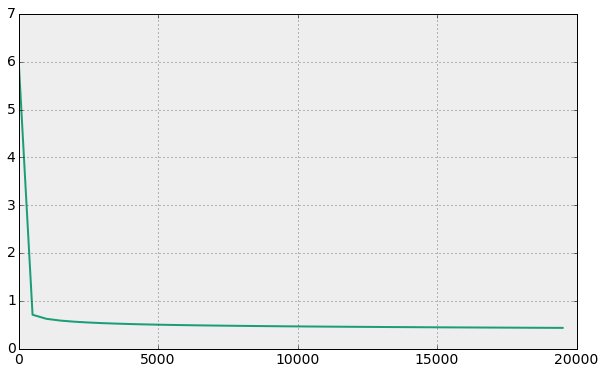

In [28]:
nnclass=NeuralNetwork(X.shape[1],12
                      
                      
                      0,np.unique(Y),0.05,3.14409321389e-06,20000,False)
nnclass.train(X.T,Y.T)

In [29]:
pclasses=nnclass.predict(XtestK.T)
print pclasses.T.shape
write_in_kaggle_format('kaggel-otto-ANN',ids,pclasses.T)

(144368L, 9L)
